<a href="https://colab.research.google.com/github/ShashwatVyas926/AER850_Project_2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Class Indices: {'crack': 0, 'missing-head': 1, 'paint-off': 2}


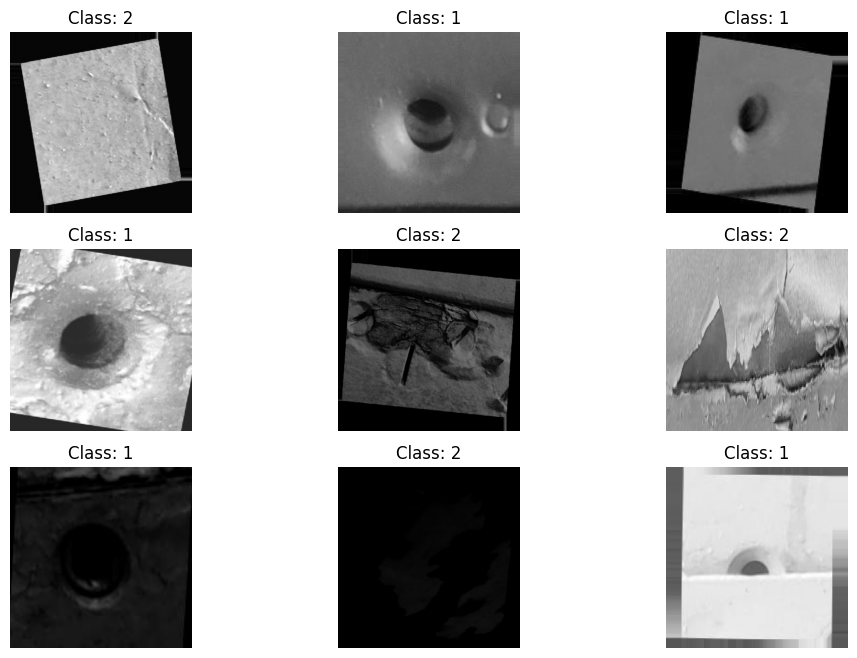

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "drive/MyDrive/AER850_Project_2/Data"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

image_size = (500, 500)
batch_size = 32
input_shape = (500, 500, 3)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical'
)

print("Class Indices:", train_generator.class_indices)

# Example: Display a batch of images
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()
